In [4]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)
partition = 60000
X_train, X_test, y_train, y_test = X[:partition], X[partition:], y[:partition], y[partition:]

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42, n_jobs=16)
sgd_classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=16, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

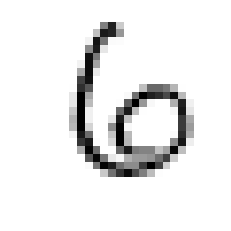

array([6], dtype=uint8)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = X_test[100]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

sgd_classifier.predict([x])

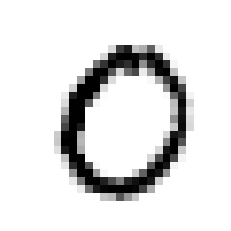

array([0], dtype=uint8)

In [8]:
x = X_test[101]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

sgd_classifier.predict([x])

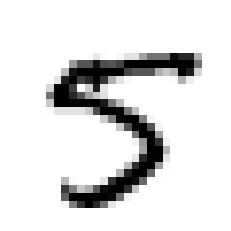

array([5], dtype=uint8)

In [10]:
x = X_test[102]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

sgd_classifier.predict([x])

In [12]:
from sklearn.model_selection import cross_val_predict

y_hat_train = cross_val_predict(sgd_classifier, X_train, y_train, cv=3)
y_hat_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_hat_train)
conf_matrix

array([[5547,    1,   71,   30,    7,   57,   61,   10,   92,   47],
       [   3, 6297,  198,   32,   10,   25,   16,   25,  107,   29],
       [  28,   41, 5315,  122,   47,   28,  104,  101,  142,   30],
       [   9,   19,  286, 5094,   15,  290,   35,   82,  125,  176],
       [   6,   21,   71,   35, 5241,   15,   49,   54,   66,  284],
       [  45,   15,   78,  400,   88, 4212,  141,   34,  272,  136],
       [  21,   10,   80,    9,   37,   92, 5593,    2,   64,   10],
       [  18,   18,   71,   29,   73,   11,    5, 5821,   18,  201],
       [  29,  114,  179,  273,   59,  254,   59,   61, 4573,  250],
       [  15,   14,   49,  137,  194,   45,    1,  552,   75, 4867]])

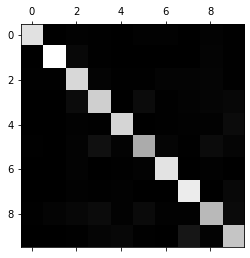

In [14]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

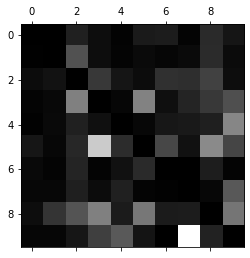

In [15]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)

plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()